In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
zeroaccess_df = pd.read_csv("zeroaccess.csv")

In [49]:
zeroaccess_df.shape

(808446, 2)

In [50]:
zeroaccess_df.head(3)

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266


In [ ]:
# zeroaccess.csv data: Geolocation (lat, long) of the client IP addresses infected
# with Zero Access Rootkits over a 24 hour period- provided by Symantec

In [ ]:
# state-internets.csv: For each state it has records of population of the state and 
# number of Internet users

In [ ]:
# conty-data.csv: has sub regioin, region, population, income, IPaddress

In [ ]:
# Q1: How is the zeroAccess infection distributed across geographic locations 
#and it there any significance to this distribution? 
# Hint: Can you do a scatter plot where X-axis is Longitude and y-axis in Lattitude

In [ ]:
# goal: often times the primary data in isolcation may not give you the 
#interesting insights while secondary datapoints if connected with the primary one 
# can be beneficial. 


In [ ]:
# Q2: What type of clients are mostly infected with ZeroAccess? Do things like 
#education level or income level affect the rate of infection?

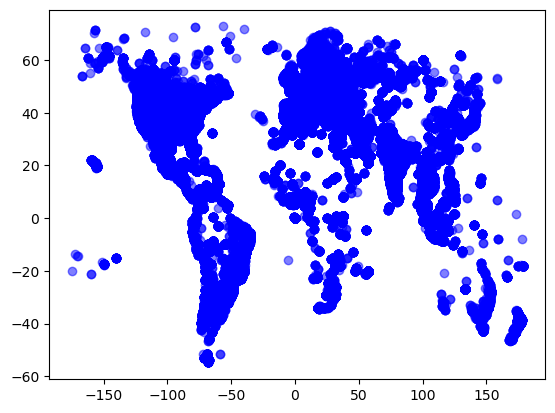

In [18]:
x= zeroaccess_df['long']
y= zeroaccess_df['lat']

plt.scatter(x, y, c="blue", alpha=.50)

In [20]:
!pip install reverse_geocode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637825 sha256=862eaeca31960bbca2f578418bf9e8e9141032384af3b3ab68e34d92376e8e3e
  Stored in directory: /Users/ahsanpritommm/Library/Caches/pip/wheels/bb/8a/f4/6dbe95660c517a6185d38cc1a4b437023b313b8f631436fdf7
Successfully built reverse_geocode


In [21]:
import reverse_geocode 


In [40]:
zeroaccess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808446 entries, 0 to 808445
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     808446 non-null  float64
 1   long    808446 non-null  float64
dtypes: float64(2)
memory usage: 12.3 MB


In [55]:
# creating the location columns by merging lattitude and longitude
zeroaccess_df["lat"] = zeroaccess_df["lat"].astype(str)
zeroaccess_df["long"] = zeroaccess_df["long"].astype(str)

zeroaccess_df["location"] = zeroaccess_df["lat"] + ", " + zeroaccess_df["long"]

In [56]:
zeroaccess_df

,lat,long,location
0,-10.0,-55.0,"-10.0, -55.0"
1,38.0888,-78.5592,"38.0888, -78.5592"
2,38.999,-84.6266,"38.999, -84.6266"
3,48.621,7.4944,"48.621, 7.4944"
4,43.2342,-86.2484,"43.2342, -86.2484"
...,...,...,...
808441,42.9634,-85.6681,"42.9634, -85.6681"
808442,43.2167,-79.75,"43.2167, -79.75"
808443,43.8833,-79.7333,"43.8833, -79.7333"
808444,-33.8833,151.2167,"-33.8833, 151.2167"


In [79]:
reverse_geocode.get((42.9634, -85.6681))

{'country_code': 'US',
 'city': 'Comstock Northwest',
 'country': 'United States'}

In [77]:
# adding the country column in the dataframe
country_list= []
for (x,y) in zip(zeroaccess_df['lat'], zeroaccess_df['long']): # iterating over 2 columns
    lat= float(x) 
    long=float(y)
    country_list.append(reverse_geocode.get((lat, long))['country'])
len(country_list)    
zeroaccess_df['country'] = country_list

In [78]:
zeroaccess_df

,lat,long,location,country
0,-10.0,-55.0,"-10.0, -55.0",Brazil
1,38.0888,-78.5592,"38.0888, -78.5592",United States
2,38.999,-84.6266,"38.999, -84.6266",United States
3,48.621,7.4944,"48.621, 7.4944",France
4,43.2342,-86.2484,"43.2342, -86.2484",United States
...,...,...,...,...
808441,42.9634,-85.6681,"42.9634, -85.6681",United States
808442,43.2167,-79.75,"43.2167, -79.75",Canada
808443,43.8833,-79.7333,"43.8833, -79.7333",Canada
808444,-33.8833,151.2167,"-33.8833, 151.2167",Australia


In [81]:
zeroaccess_df['country'].value_counts()

United States                             276104
Canada                                     42255
Japan                                      34756
United Kingdom                             33707
Italy                                      30268
                                           ...  
Sao Tome and Principe                          1
Samoa                                          1
Saint Pierre and Miquelon                      1
Kiribati                                       1
Korea, Democratic People's Republic of         1
Name: country, Length: 224, dtype: int64

In [83]:
#!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.4 MB/s eta 0:00:00


In [84]:
from geopy.geocoders import Nominatim

In [85]:
# Can be used for mapping lat, long coordinates back to details address like county, 
#city, state
geolocator = Nominatim(user_agent="geoapiExercises")

In [97]:
# Example to show how lat, long can be converted to detail address
Latitude = "38.0888"
Longitude = "-78.5592"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
location.raw['address']

{'road': 'Garth Gate Lane',
 'county': 'Albemarle County',
 'state': 'Virginia',
 'ISO3166-2-lvl4': 'US-VA',
 'postcode': '22901',
 'country': 'United States',
 'country_code': 'us'}

In [ ]:
#RQ1: Is there any association or impact of income or population with the number of 
#ZeroAccess infection?
# Task 1.1: Connect the zero access data with state-internet and county data (which 
#has income-level for each county)
# Task 1.2: Can we draw a state level United States  heatmap (see page 115 in data-driven security 
#book) with the number of infections per state? Does it make sense or tell the real story? 
#Hint for 1.2: May be some states have high population and that is the reason of 
#high infections, isn't it? 
# Task 1.3: Can we draw the same state level US heatmap but with a different metric (what 
#proportion of the population is infected)?
#Hint: See book page 116
# Task 1.4: Finally, once we have avg income for each county and their propostion of 
# zeroaccess infections per county, then can we derive the relationship (correlation coef.)
#and linear regression line (e.g., lmplot) between these 2 variables?
